# Telco-customer-churn

## EDA (l'analyse exploratoire des données) et Prédiction

## Analyse et prétraitement des données

Le churn est l'un des plus grands problèmes dans l'industrie des télécommunications. Les recherches ont montré que le taux de churn mensuel moyen parmi les 4 principaux opérateurs sans fil aux États-Unis est de 1,9% - 2%.

## Description de nos données

customerID: Identifiant unique du client.

gender: Sexe du client.

SeniorCitizen: Indique le statut de personne âgée.

Partner: Indique si le client a un partenaire.

Dependents: Indique si le client a des personnes à charge.

tenure: Nombre de mois avec l'entreprise.

PhoneService: Indique le service téléphonique.

MultipleLines: Indique les lignes multiples.

InternetService: Type de service internet.

OnlineSecurity: Service de sécurité en ligne.

OnlineBackup: Service de sauvegarde en ligne.

DeviceProtection: Service de protection des appareils.

TechSupport: Service de support technique.

StreamingTV: Service de streaming TV.

StreamingMovies: Service de streaming de films.

Contract: Type de contrat.

PaperlessBilling: Facturation sans papier.

PaymentMethod: Méthode de paiement.

MonthlyCharges: Frais mensuels.

TotalCharges: Frais totaux.

Churn: Indique si le client a résilié.

## Importation de quelques bibliothèques

In [ ]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement de données, E/S de fichiers CSV (ex: pd.read_csv)
import seaborn as sns # Pour créer des graphiques
import matplotlib.ticker as mtick # Pour spécifier le format des graduations des axes
import matplotlib.pyplot as plt

sns.set(style = 'white')

## Lisons le fichier de données dans le notebook Python

In [ ]:
telecom_cust = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## Explorons les données pour voir s'il y a des valeurs manquantes

In [ ]:
# Checking the data types of all the columns
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Conversion des frais totaux en type de données numérique.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Après avoir examiné la sortie ci-dessus, nous pouvons dire qu'il y a 11 valeurs manquantes pour les frais totaux. Supprimons ces 11 lignes de notre ensemble de données

In [ ]:
# Suppression des valeurs manquantes
telecom_cust.dropna(inplace = True)
# Suppression des identifiants clients de l'ensemble de données
df2 = telecom_cust.iloc[:,1:]
# Conversion de la variable prédictive en variable numérique binaire
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Convertissons toutes les variables catégorielles en variables fictives
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

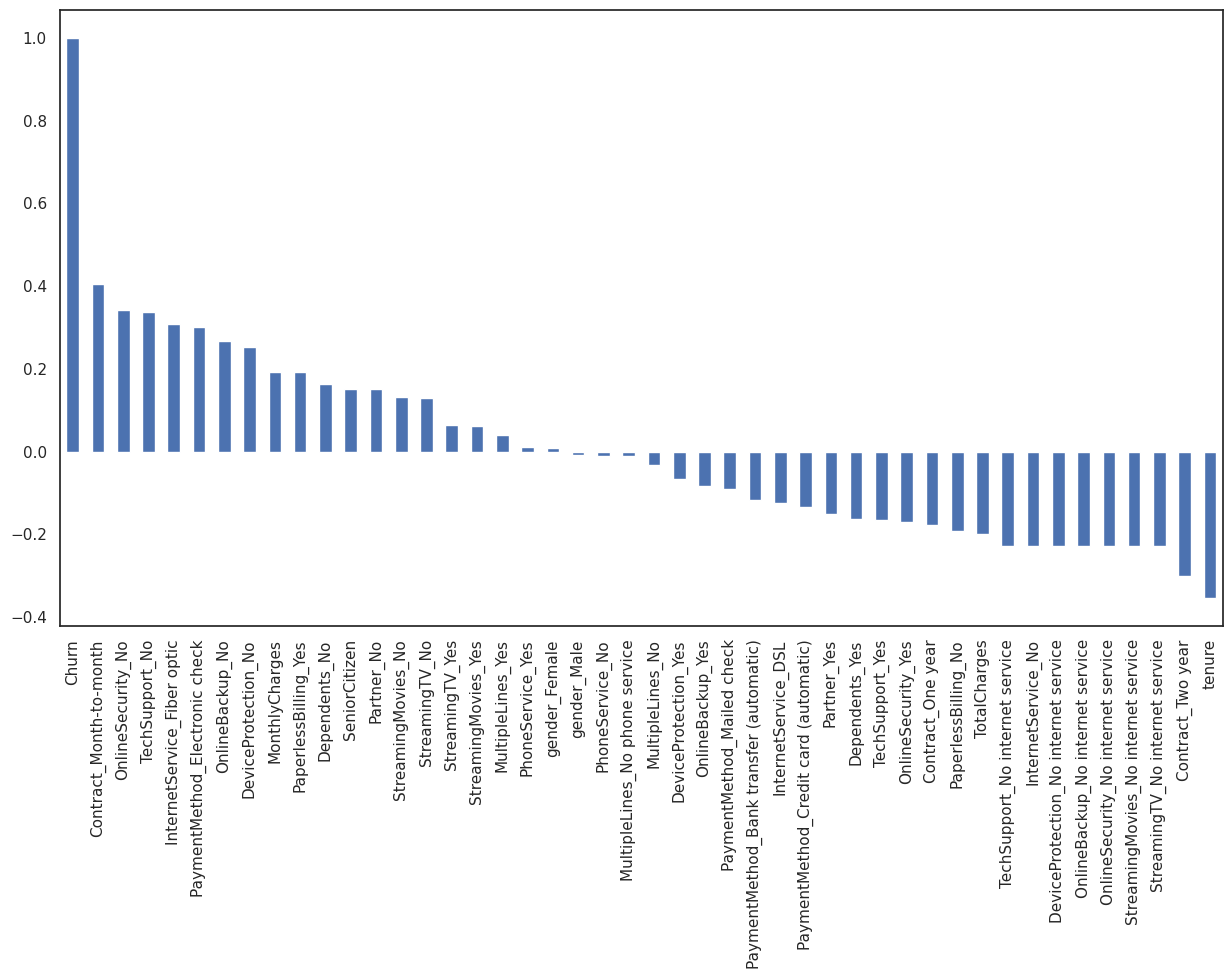

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Les contrats mensuels, l'absence de sécurité en ligne et de support technique semblent être positivement corrélés avec le churn. Tandis que la durée d'ancienneté et les contrats de deux ans semblent être négativement corrélés avec le churn.

Fait intéressant, les services tels que la sécurité en ligne, la télévision en streaming, la sauvegarde en ligne, le support technique, etc. sans connexion internet semblent être négativement liés au churn.

Nous explorerons les tendances de ces corrélations ci-dessous avant de nous plonger dans la modélisation et l'identification des variables importantes.

## Exploration des données

Commençons par explorer notre ensemble de données, pour mieux comprendre les tendances dans les données et potentiellement former quelques hypothèses. Nous examinerons d'abord la distribution des variables individuelles, puis nous analyserons nos données sous différents angles pour identifier des tendances intéressantes.

## A.) Données démographiques - Comprenons d'abord le sexe, la tranche d'âge, le statut de partenaire et de personnes à charge des clients

1. Distribution par sexe - Environ la moitié des clients de notre ensemble de données sont des hommes tandis que l'autre moitié sont des femmes

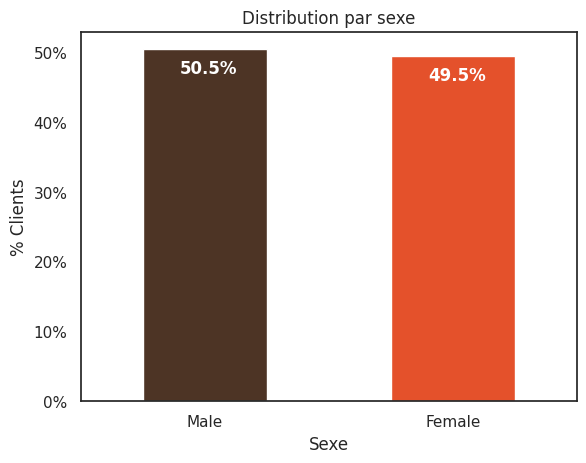

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clients')
ax.set_xlabel('Sexe')
ax.set_ylabel('% Clients')
ax.set_title('Distribution par sexe')

# créer une liste pour collecter les données plt.patches
totals = []

# trouver les valeurs et les ajouter à la liste
for i in ax.patches:
    totals.append(i.get_width())

# définir les étiquettes de barres individuelles en utilisant la liste ci-dessus
total = sum(totals)

for i in ax.patches:
    # get_width tire à gauche ou à droite; get_y pousse vers le haut ou vers le bas
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. % Personnes âgées - Il n'y a que 16% des clients qui sont des personnes âgées. Ainsi, la plupart de nos clients dans les données sont des personnes plus jeunes.

Text(0.5, 1.0, '% of Senior Citizens')

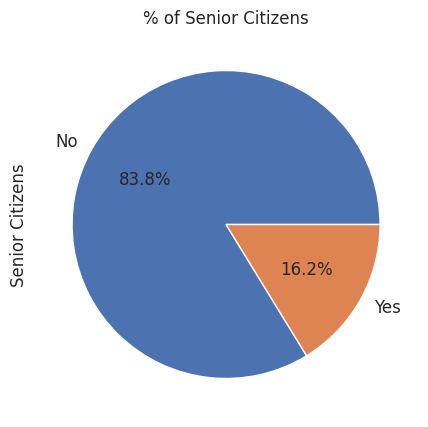

In [ ]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. Statut de partenaire et de personnes à charge - Environ 50% des clients ont un partenaire, tandis que seulement 30% du total des clients ont des personnes à charge

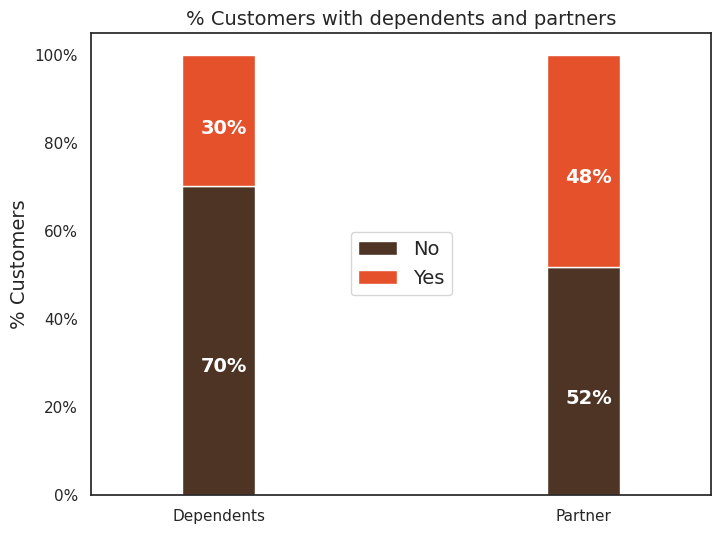

In [ ]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


## Ce qui serait intéressant, c'est d'examiner le % de clients qui ont un partenaire et qui ont également des personnes à charge. Nous allons explorer cela ensuite.


Fait intéressant, parmi les clients qui ont un partenaire, seulement environ la moitié d'entre eux ont également des personnes à charge, tandis que l'autre moitié n'a aucune personne à charge. De plus, comme prévu, parmi les clients qui n'ont pas de partenaire, une majorité (80%) d'entre eux n'ont aucune personne à charge.

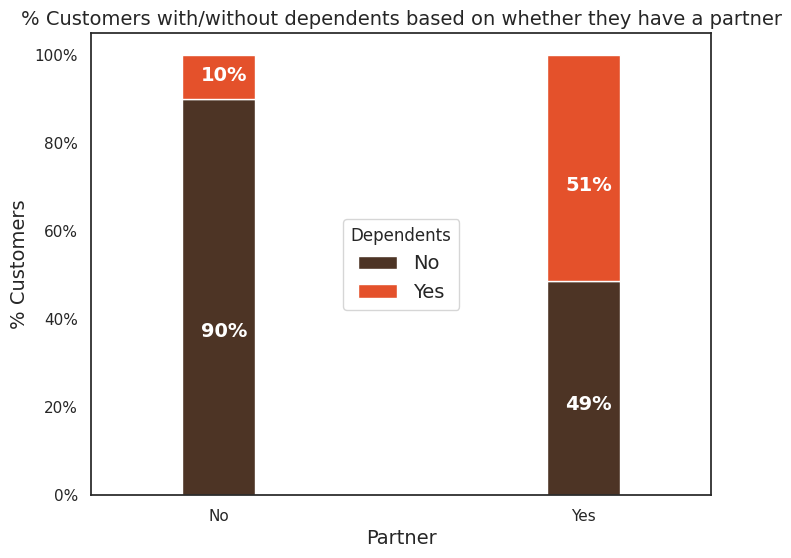

In [ ]:
colors = ['#4D3425','#E4512B']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

J'ai également examiné les différences entre le % de clients avec/sans personnes à charge et partenaires par sexe. Il n'y a aucune différence dans leur distribution par sexe. De plus, il n'y a aucune différence dans le statut de personne âgée par sexe.

## B.) Informations sur le compte client : Examinons maintenant la durée d'ancienneté et le contrat



1. Durée d'ancienneté : Après avoir examiné l'histogramme ci-dessous, nous pouvons voir que beaucoup de clients sont avec l'entreprise de télécommunications depuis seulement un mois, tandis qu'un bon nombre sont là depuis environ 72 mois. Cela pourrait être potentiellement dû au fait que différents clients ont différents contrats. Ainsi, en fonction du contrat qu'ils ont, il pourrait être plus/moins facile pour les clients de rester/quitter l'entreprise de télécommunications.

Text(0.5, 1.0, '# of Customers by their tenure')

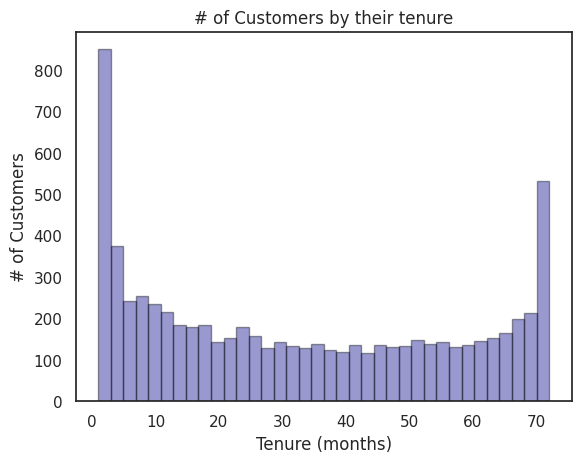

In [ ]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

2. Contrats : Pour comprendre le graphique ci-dessus, examinons d'abord le nombre de clients par différents contrats.

Text(0.5, 1.0, '# of Customers by Contract Type')

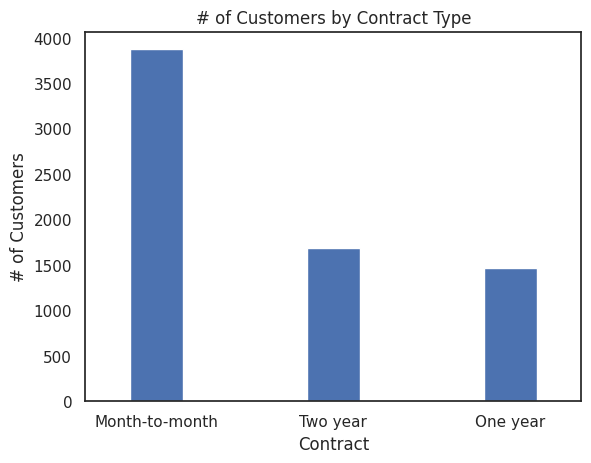

In [ ]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Comme nous pouvons le voir sur ce graphique, la plupart des clients sont dans le contrat mensuel. Alors qu'il y a un nombre égal de clients dans les contrats d'un an et de deux ans.


Ci-dessous, nous comprendrons la durée d'ancienneté des clients en fonction de leur type de contrat.

Text(0.5, 1.0, 'Two Year Contract')

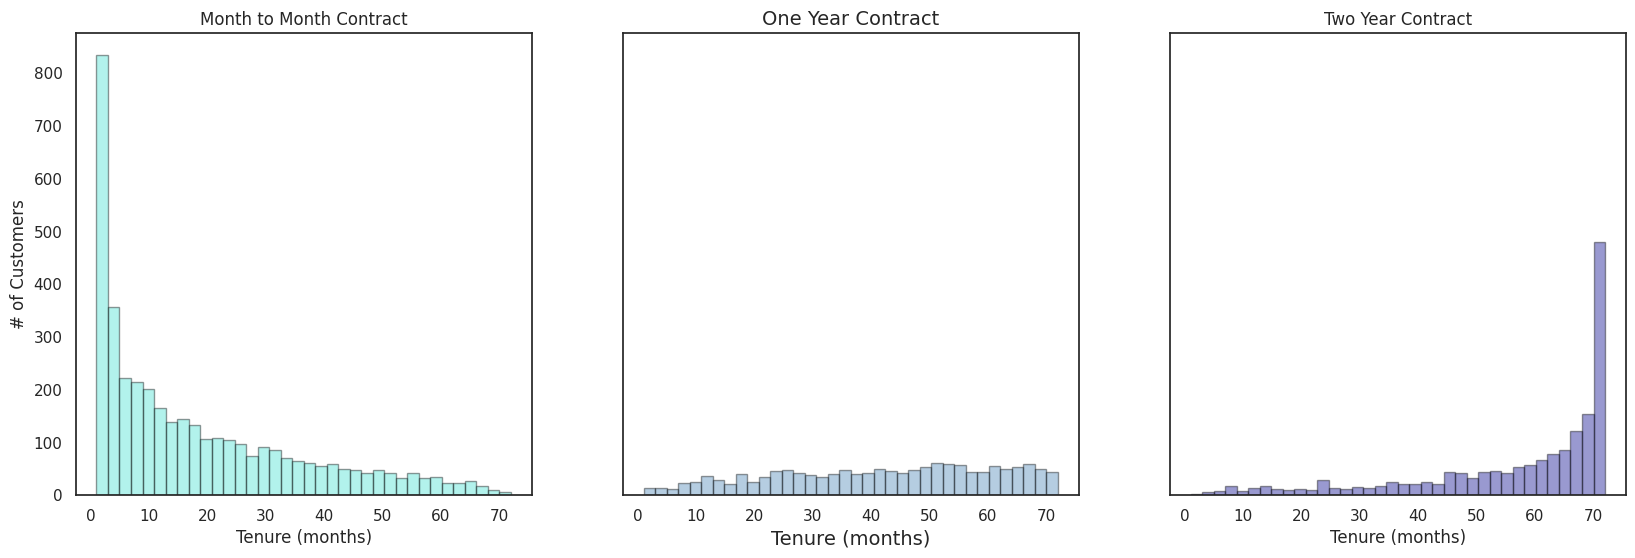

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Fait intéressant, la plupart des contrats mensuels durent 1 à 2 mois, tandis que les contrats de 2 ans ont tendance à durer environ 70 mois. Cela montre que les clients souscrivant un contrat plus long sont plus fidèles à l'entreprise et ont tendance à rester avec elle pendant une période plus longue.


C'est également ce que nous avons vu dans le graphique précédent sur la corrélation avec le taux de churn.

## C. Examinons maintenant la distribution des différents services utilisés par les clients

In [ ]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

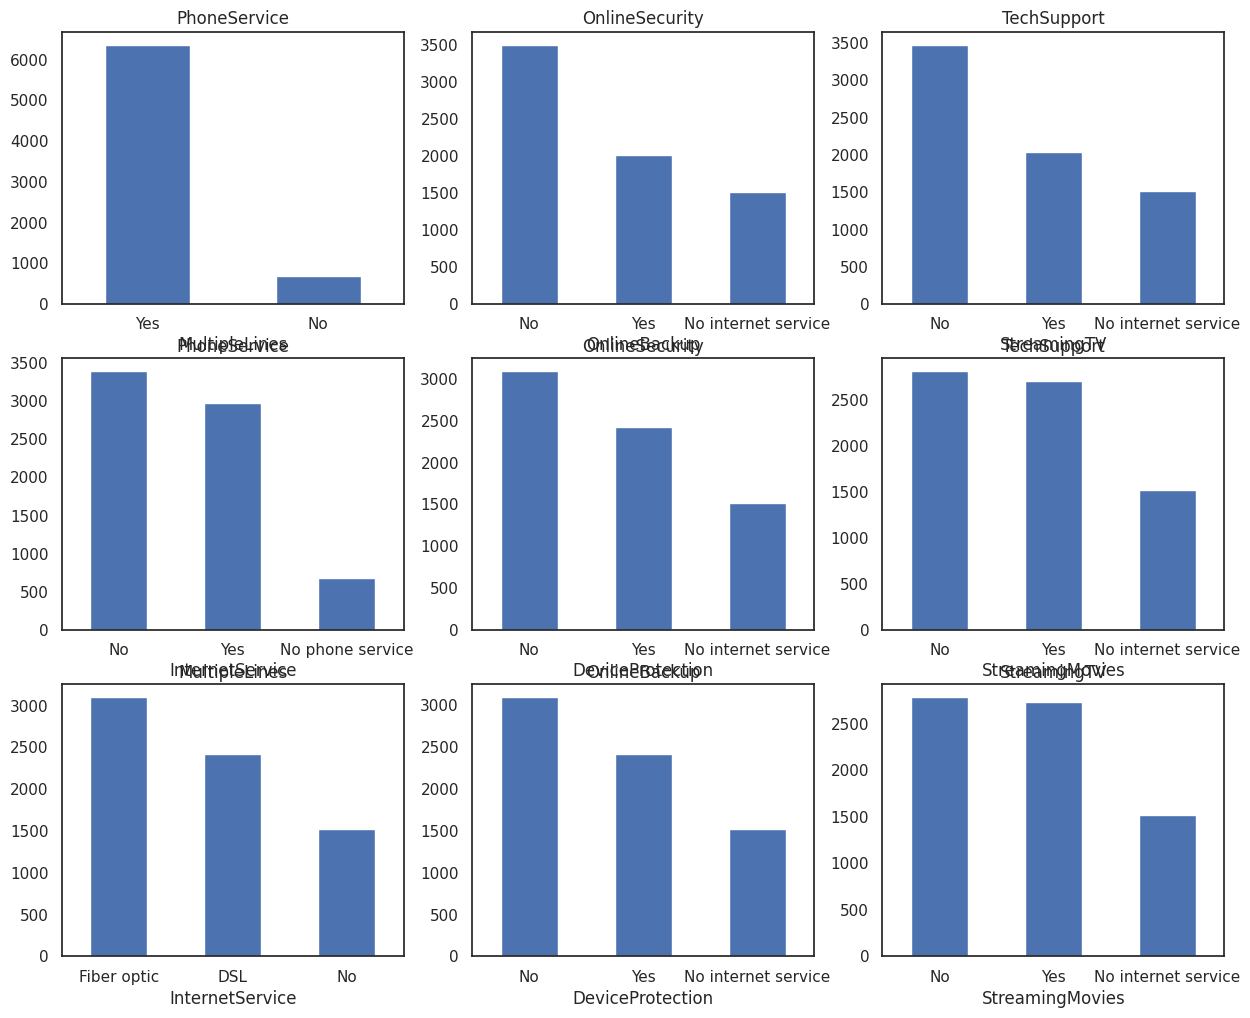

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)

    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)

    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

## D.) Maintenant jetons un coup d'œil rapide à la relation entre les frais mensuels et les frais totaux


Nous observerons que les frais totaux augmentent à mesure que la facture mensuelle d'un client augmente.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

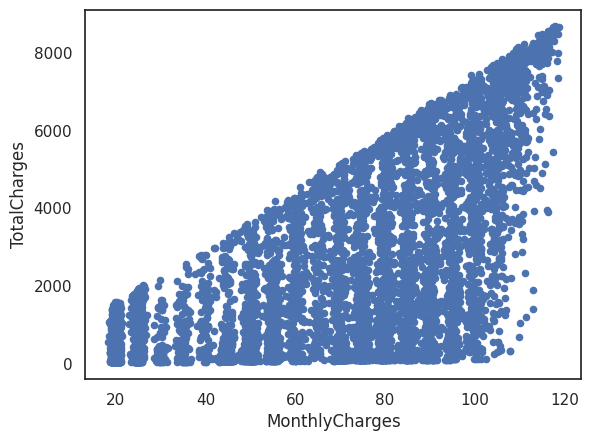

In [ ]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

## E.) Enfin, jetons un coup d'œil à notre variable prédictive (Churn) et comprenons son interaction avec d'autres variables importantes comme cela a été découvert dans le graphique de corrélation.

1. Examinons d'abord le taux de churn dans nos données

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

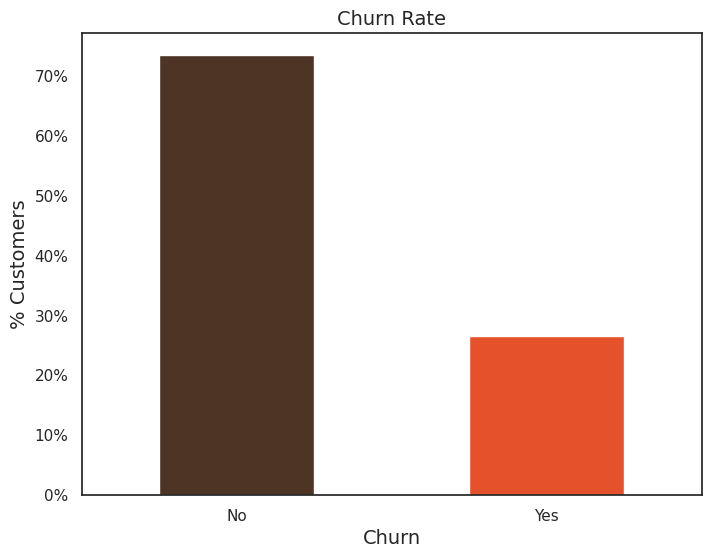

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
            weight = 'bold',
            size = 14)


Dans nos données, 74% des clients ne font pas de churn. Clairement, les données sont biaisées car nous nous attendrions à ce qu'une grande majorité des clients ne fassent pas de churn. Ceci est important à garder à l'esprit pour notre modélisation car le biais pourrait conduire à beaucoup de faux négatifs. Nous verrons dans la section de modélisation comment éviter le biais dans les données.

  1. Explorons maintenant le taux de churn par durée d'ancienneté, statut de personne âgée, type de contrat, frais mensuels et frais totaux pour voir comment il varie selon ces variables.


i.) Churn vs Durée d'ancienneté : Comme nous pouvons le voir sur le graphique ci-dessous, les clients qui ne font pas de churn ont tendance à rester pour une durée d'ancienneté plus longue avec l'entreprise de télécommunications.

<Axes: xlabel='Churn', ylabel='tenure'>

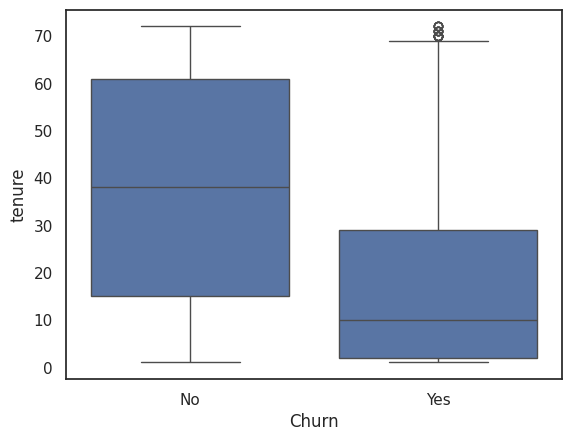

In [ ]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

ii.) Churn par type de contrat : Similaire à ce que nous avons vu dans le graphique de corrélation, les clients qui ont un contrat mensuel ont un taux de churn très élevé.

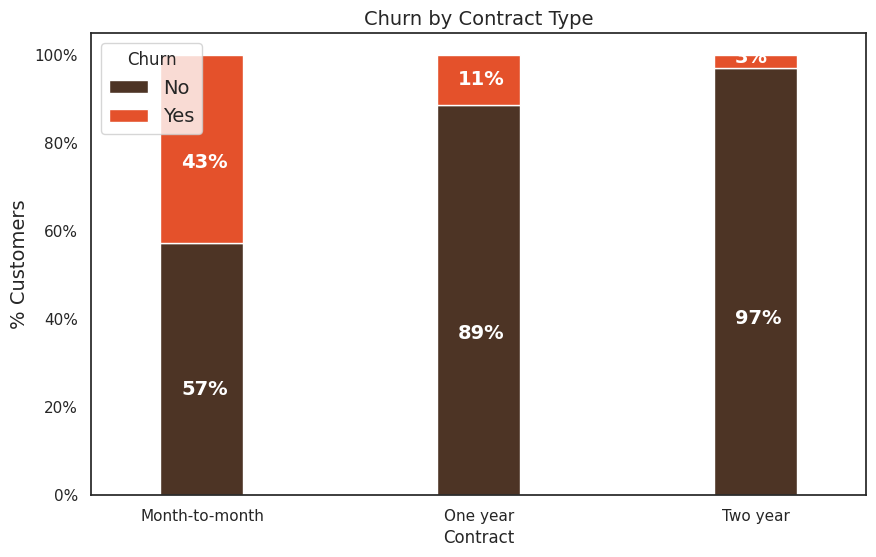

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

iii.) Churn par ancienneté : Les personnes âgées ont presque le double du taux de churn par rapport à la population plus jeune.

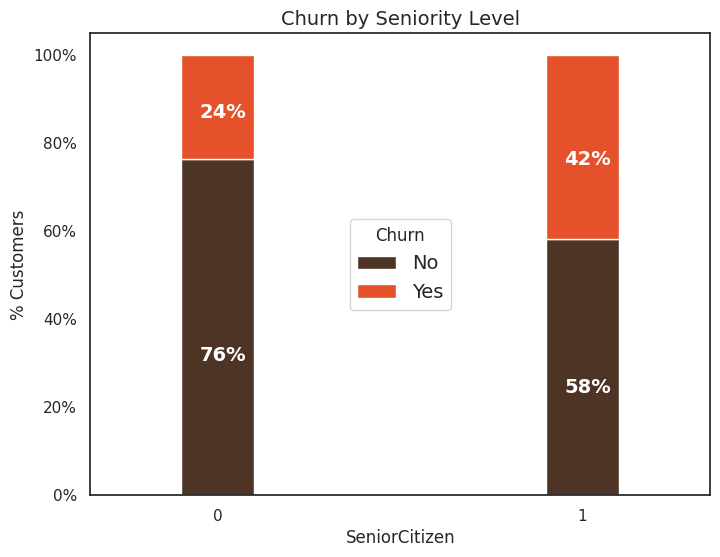

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

iv.) Churn par frais mensuels : Un pourcentage plus élevé de clients font du churn lorsque les frais mensuels sont élevés.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

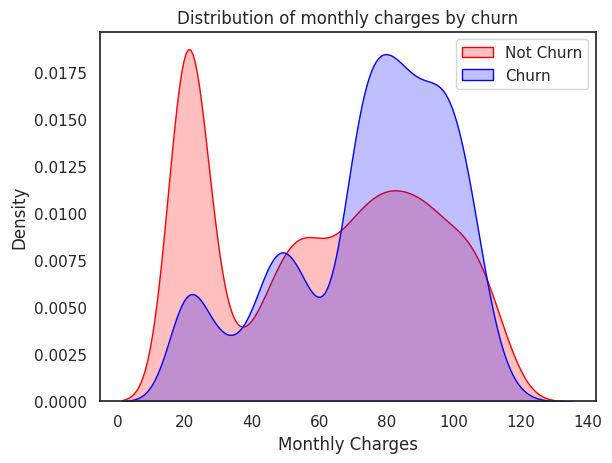

In [ ]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

v.) Churn par frais totaux : Il semble qu'il y ait un churn plus élevé lorsque les frais totaux sont plus faibles.

Text(0.5, 1.0, 'Distribution of total charges by churn')

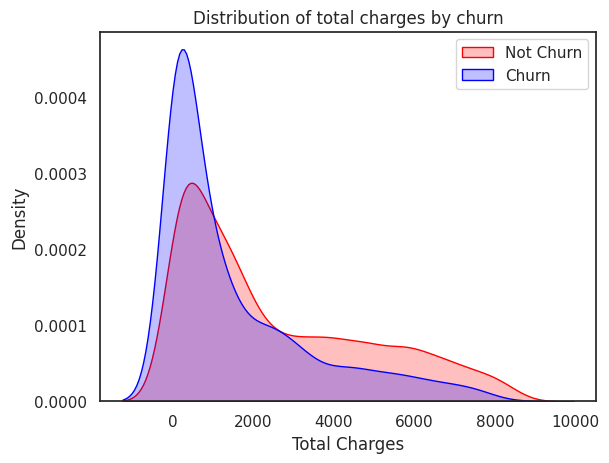

In [ ]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

## Après avoir parcouru l'analyse exploratoire des données ci-dessus, nous allons développer des modèles prédictifs et choisir le meilleur.

Nous allons développer XG Boost, Support Vecor Machine (SVM)

## 3. Support Vecor Machine (SVM)

Avec SVM, j'ai pu augmenter la précision jusqu'à 82%. Cependant, nous devons examiner plus en profondeur les taux de vrais positifs et de vrais négatifs, y compris l'aire sous la courbe (AUC) pour une meilleure prédiction. J'explorerai cela bientôt. Restez à l'écoute !

## XG Boost

Fait intéressant, avec XG Boost, j'ai pu augmenter la précision sur les données de test à presque 83%. Clairement, XG Boost est un gagnant parmi toutes les autres techniques. XG Boost est un modèle d'apprentissage lent et est basé sur le concept de Boosting

# Entrainement du modèle

In [ ]:
# --- Importation des bibliothèques supplémentaires pour le ML ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# --- Préparation des données ---
# Séparation des features et de la cible
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalisation des données (important pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensions des ensembles :")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
print(f"Proportion de churn dans l'ensemble d'entraînement : {y_train.mean():.3f}")
print(f"Proportion de churn dans l'ensemble de test : {y_test.mean():.3f}\n")

# --- Fonction d'évaluation ---
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    """Évalue un modèle et affiche les métriques"""

    print(f"=== Évaluation du modèle {model_name} ===")

    # Prédictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métriques
    print("1. Précision (Accuracy):")
    print(f"   Entraînement: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"   Test: {accuracy_score(y_test, y_test_pred):.4f}")

    if y_test_proba is not None:
        print(f"\n2. AUC-ROC (Test): {roc_auc_score(y_test, y_test_proba):.4f}")

    print("\n3. Matrice de confusion (Test):")
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"   Vrais Négatifs (TN): {cm[0, 0]}")
    print(f"   Faux Positifs (FP): {cm[0, 1]}")
    print(f"   Faux Négatifs (FN): {cm[1, 0]}")
    print(f"   Vrais Positifs (TP): {cm[1, 1]}")

    print("\n4. Rapport de classification (Test):")
    print(classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn']))

    print("-" * 50)
    return y_test_pred, y_test_proba



Dimensions des ensembles :
Train: (4922, 45), Test: (2110, 45)
Proportion de churn dans l'ensemble d'entraînement : 0.266
Proportion de churn dans l'ensemble de test : 0.266



## SVM et XG BOOST


ENTRAÎNEMENT DU MODÈLE SVM
=== Évaluation du modèle SVM ===
1. Précision (Accuracy):
   Entraînement: 0.8232
   Test: 0.7948

2. AUC-ROC (Test): 0.7964

3. Matrice de confusion (Test):
   Vrais Négatifs (TN): 1398
   Faux Positifs (FP): 151
   Faux Négatifs (FN): 282
   Vrais Positifs (TP): 279

4. Rapport de classification (Test):
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87      1549
       Churn       0.65      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110

--------------------------------------------------

ENTRAÎNEMENT DU MODÈLE XGBOOST
=== Évaluation du modèle XGBoost ===
1. Précision (Accuracy):
   Entraînement: 0.8590
   Test: 0.7991

2. AUC-ROC (Test): 0.8344

3. Matrice de confusion (Test):
   Vrais Négatifs (TN): 1388
   Faux Positifs (FP): 161
   Faux Négatifs (FN): 263
   Vrais P

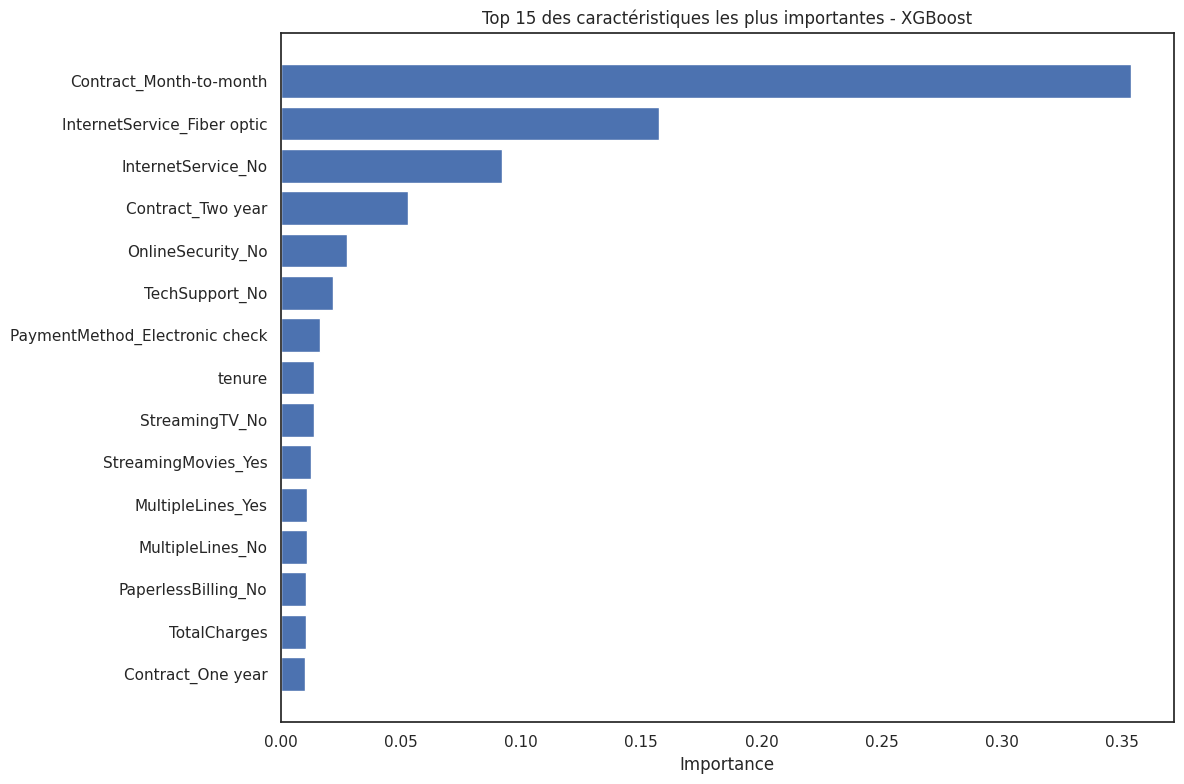


COMPARAISON DES MODÈLES

Comparaison des performances :
 Modèle  Accuracy  AUC-ROC  Précision (Churn)  Rappel (Churn)  F1-Score (Churn)
    SVM    0.7948   0.7964             0.6488          0.4973            0.5631
XGBoost    0.7991   0.8344             0.6492          0.5312            0.5843

COURBES ROC


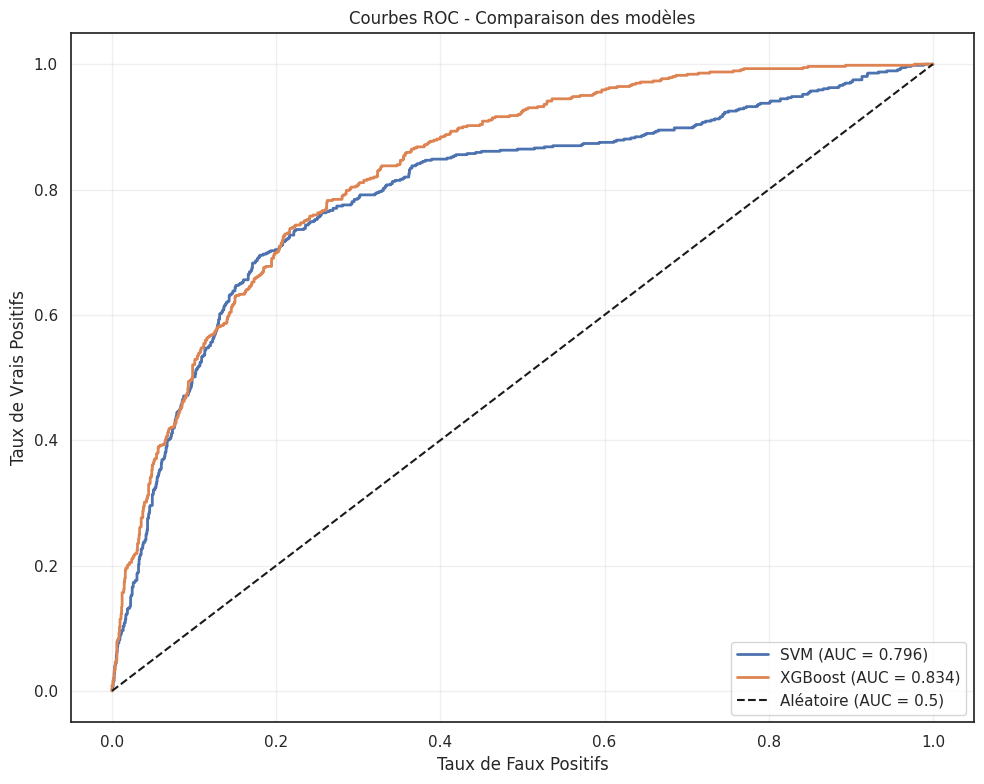


CONCLUSION
Le meilleur modèle est : XGBoost
Avec une précision de : 0.7991

Les caractéristiques les plus importantes pour prédire le churn sont :
  • Contract_Month-to-month : 0.3539
  • InternetService_Fiber optic : 0.1573
  • InternetService_No : 0.0920
  • Contract_Two year : 0.0530
  • OnlineSecurity_No : 0.0276

Suggestions pour améliorer les modèles :
1. Effectuer une recherche d'hyperparamètres (GridSearchCV ou RandomizedSearchCV)
2. Gérer le déséquilibre des classes (SMOTE, class_weight)
3. Essayer d'autres algorithmes (Random Forest, Gradient Boosting)
4. Réduire la dimensionnalité (PCA, feature selection)


In [ ]:
# --- Modèle 1: SVM ---
print("\n" + "="*60)
print("ENTRAÎNEMENT DU MODÈLE SVM")
print("="*60)

# Création et entraînement du modèle SVM
svm_model = SVC(
    kernel='rbf',           # Kernel radial pour les problèmes non-linéaires
    C=1.0,                  # Paramètre de régularisation
    gamma='scale',          # Paramètre du kernel
    probability=True,       # Pour obtenir les probabilités
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

# Évaluation SVM
svm_pred, svm_proba = evaluate_model("SVM", svm_model, X_train_scaled, X_test_scaled, y_train, y_test)

# --- Modèle 2: XGBoost ---
print("\n" + "="*60)
print("ENTRAÎNEMENT DU MODÈLE XGBOOST")
print("="*60)

# Création et entraînement du modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,       # Nombre d'arbres
    learning_rate=0.1,      # Taux d'apprentissage
    max_depth=5,            # Profondeur maximale des arbres
    min_child_weight=1,     # Poids minimum des feuilles
    subsample=0.8,          # Proportion d'échantillons utilisés pour chaque arbre
    colsample_bytree=0.8,   # Proportion de features utilisées pour chaque arbre
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# Évaluation XGBoost
xgb_pred, xgb_proba = evaluate_model("XGBoost", xgb_model, X_train, X_test, y_train, y_test)

# --- Feature Importance pour XGBoost ---
print("\n" + "="*60)
print("IMPORTANCE DES CARACTÉRISTIQUES - XGBOOST")
print("="*60)

# Récupération des importances
importances = xgb_model.feature_importances_
feature_names = X.columns

# Création d'un DataFrame pour les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Affichage des 15 features les plus importantes
print("Top 15 des caractéristiques les plus importantes :")
print(importance_df.head(15).to_string(index=False))

# Visualisation des importances
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 des caractéristiques les plus importantes - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Comparaison des modèles ---
print("\n" + "="*60)
print("COMPARAISON DES MODÈLES")
print("="*60)

# Calcul des métriques de comparaison
comparison_data = []

for name, pred, proba in [('SVM', svm_pred, svm_proba), ('XGBoost', xgb_pred, xgb_proba)]:
    acc = accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba) if proba is not None else None

    # Calcul de la précision, rappel et F1-score pour la classe Churn
    report = classification_report(y_test, pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    comparison_data.append({
        'Modèle': name,
        'Accuracy': acc,
        'AUC-ROC': auc,
        'Précision (Churn)': precision,
        'Rappel (Churn)': recall,
        'F1-Score (Churn)': f1
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nComparaison des performances :")
print(comparison_df.to_string(index=False, float_format=lambda x: f'{x:.4f}' if x is not None else 'N/A'))

# --- Courbes ROC ---
print("\n" + "="*60)
print("COURBES ROC")
print("="*60)

plt.figure(figsize=(10, 8))

# Courbe ROC pour SVM
if svm_proba is not None:
    fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_proba)
    auc_svm = roc_auc_score(y_test, svm_proba)
    plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})', linewidth=2)

# Courbe ROC pour XGBoost
if xgb_proba is not None:
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
    auc_xgb = roc_auc_score(y_test, xgb_proba)
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)

# Courbe de référence (aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC = 0.5)')

plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC - Comparaison des modèles')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Conclusion ---
print("\n" + "="*60)
print("CONCLUSION")
print("="*60)

# Détermination du meilleur modèle
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Modèle']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"Le meilleur modèle est : {best_model}")
print(f"Avec une précision de : {best_accuracy:.4f}")

# Affichage des caractéristiques clés pour la prédiction du churn
print("\nLes caractéristiques les plus importantes pour prédire le churn sont :")
for idx, row in importance_df.head(5).iterrows():
    print(f"  • {row['Feature']} : {row['Importance']:.4f}")

# Suggestions basées sur les résultats
print("\nSuggestions pour améliorer les modèles :")
print("1. Effectuer une recherche d'hyperparamètres (GridSearchCV ou RandomizedSearchCV)")
print("2. Gérer le déséquilibre des classes (SMOTE, class_weight)")
print("3. Essayer d'autres algorithmes (Random Forest, Gradient Boosting)")
print("4. Réduire la dimensionnalité (PCA, feature selection)")

# Sauvegarder

In [ ]:
import joblib

# Sauvegarde des poids du modèle
joblib.dump(xgb_model, "modele.joblib")
print("Modèle sauvegardé avec succès !")

Modèle sauvegardé avec succès !
